# Gravity Machine analysis notebook

This notebook contains usage examples and worflows for Gravity Machine data analysis.

Earlier version of this analysis pipeline was used for generating figures for the paper:

> Krishnamurthy, Deepak, Hongquan Li, François Benoit du Rey, Pierre Cambournac, Adam G. Larson, Ethan Li, and Manu Prakash. "Scale-free vertical tracking microscopy." Nature Methods 17, no. 10 (2020): 1040-1051.

In [2]:
# Reload modules
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
import GravityMachine.Analysis as Analysis
import imp
imp.reload(Analysis)
import matplotlib.pyplot as plt
%matplotlib notebook

## Specify the data path and load the data as a GravityMachineTrack object

In [3]:
# WARNING: Replace the path here with the actual path of your data
# track_folder = '/Volumes/DEEPAK-1TB/PuertoRico_2018/GravityMachineData/2018_11_06/Tow_1/Centric_diatom_3_Good'
track_folder = '/Users/deepak/GravityMachine/aggregate_2021-06-07 18-39-50'
# REPLACE the filename here with the actual filename
# track_file = 'track_cropped.csv'
track_file = 'track000.csv'
gm_analysis = Analysis.GravityMachineTrack(track_folder = track_folder, track_file = track_file, Tmin = 0, Tmax = 360)
gm_analysis.data

**************************************************
Loading metadata file ...
Loaded metadata...
{'Local time': '2021-06-07, 18:39:50.803334', 'PixelPermm': 432, 'Objective': '4x'}
**************************************************
['Time', 'X_objStage', 'Y_objStage', 'Z_objStage', 'Theta_stage', 'X_image', 'Z_image', 'track_focus', 'track_obj_stage', 'liquidLens_Freq', 'liquidLens_Amp', 'FocusPhase', 'DF1', 'DF2']
{'Time': 'Time', 'X': 'X_objStage', 'Y': 'Y_objStage', 'Z': 'Z_objStage', 'Image name': 'DF1', 'X_image': 'X_image', 'Z_image': 'Z_image'}
Dir:  /Users/deepak/GravityMachine/aggregate_2021-06-07 18-39-50/DF1/00000
Subdir:  []
Dir:  /Users/deepak/GravityMachine/aggregate_2021-06-07 18-39-50/DF1
Subdir:  ['00000']
Dir:  /Users/deepak/GravityMachine/aggregate_2021-06-07 18-39-50/DF2/00000
Subdir:  []
Dir:  /Users/deepak/GravityMachine/aggregate_2021-06-07 18-39-50/DF2/00001
Subdir:  []
Dir:  /Users/deepak/GravityMachine/aggregate_2021-06-07 18-39-50/DF2
Subdir:  ['00000', '00001

,Time,X,Y,Z,Image name,X_image,Z_image,V_x,V_y,V_z
0,0.000000,3.540889,-6.908,0.000000,[],0.008889,-0.400000,None,None,None
1,0.009748,3.536444,-6.908,0.004444,NaN,0.004444,-0.395556,None,None,None
2,0.024103,3.540889,-6.908,0.000000,NaN,0.008889,-0.400000,None,None,None
3,0.039449,3.540889,-6.908,0.000000,0000000.tif,0.008889,-0.400000,None,None,None
4,0.047152,3.536444,-6.908,0.000000,NaN,0.004444,-0.400000,None,None,None
...,...,...,...,...,...,...,...,...,...,...
3860,51.781538,5.216444,-6.908,-46.200751,NaN,0.004444,-0.582222,None,None,None
3861,51.804869,5.216444,-6.908,-46.205196,0000952.tif,0.004444,-0.586667,None,None,None
3862,51.812476,5.216444,-6.908,-46.205196,NaN,0.004444,-0.586667,None,None,None
3863,51.825791,5.216444,-6.908,-46.205196,NaN,0.004444,-0.586667,None,None,None


## Plot the object's X, Y, Z displacement time series

<IPython.core.display.Javascript object>


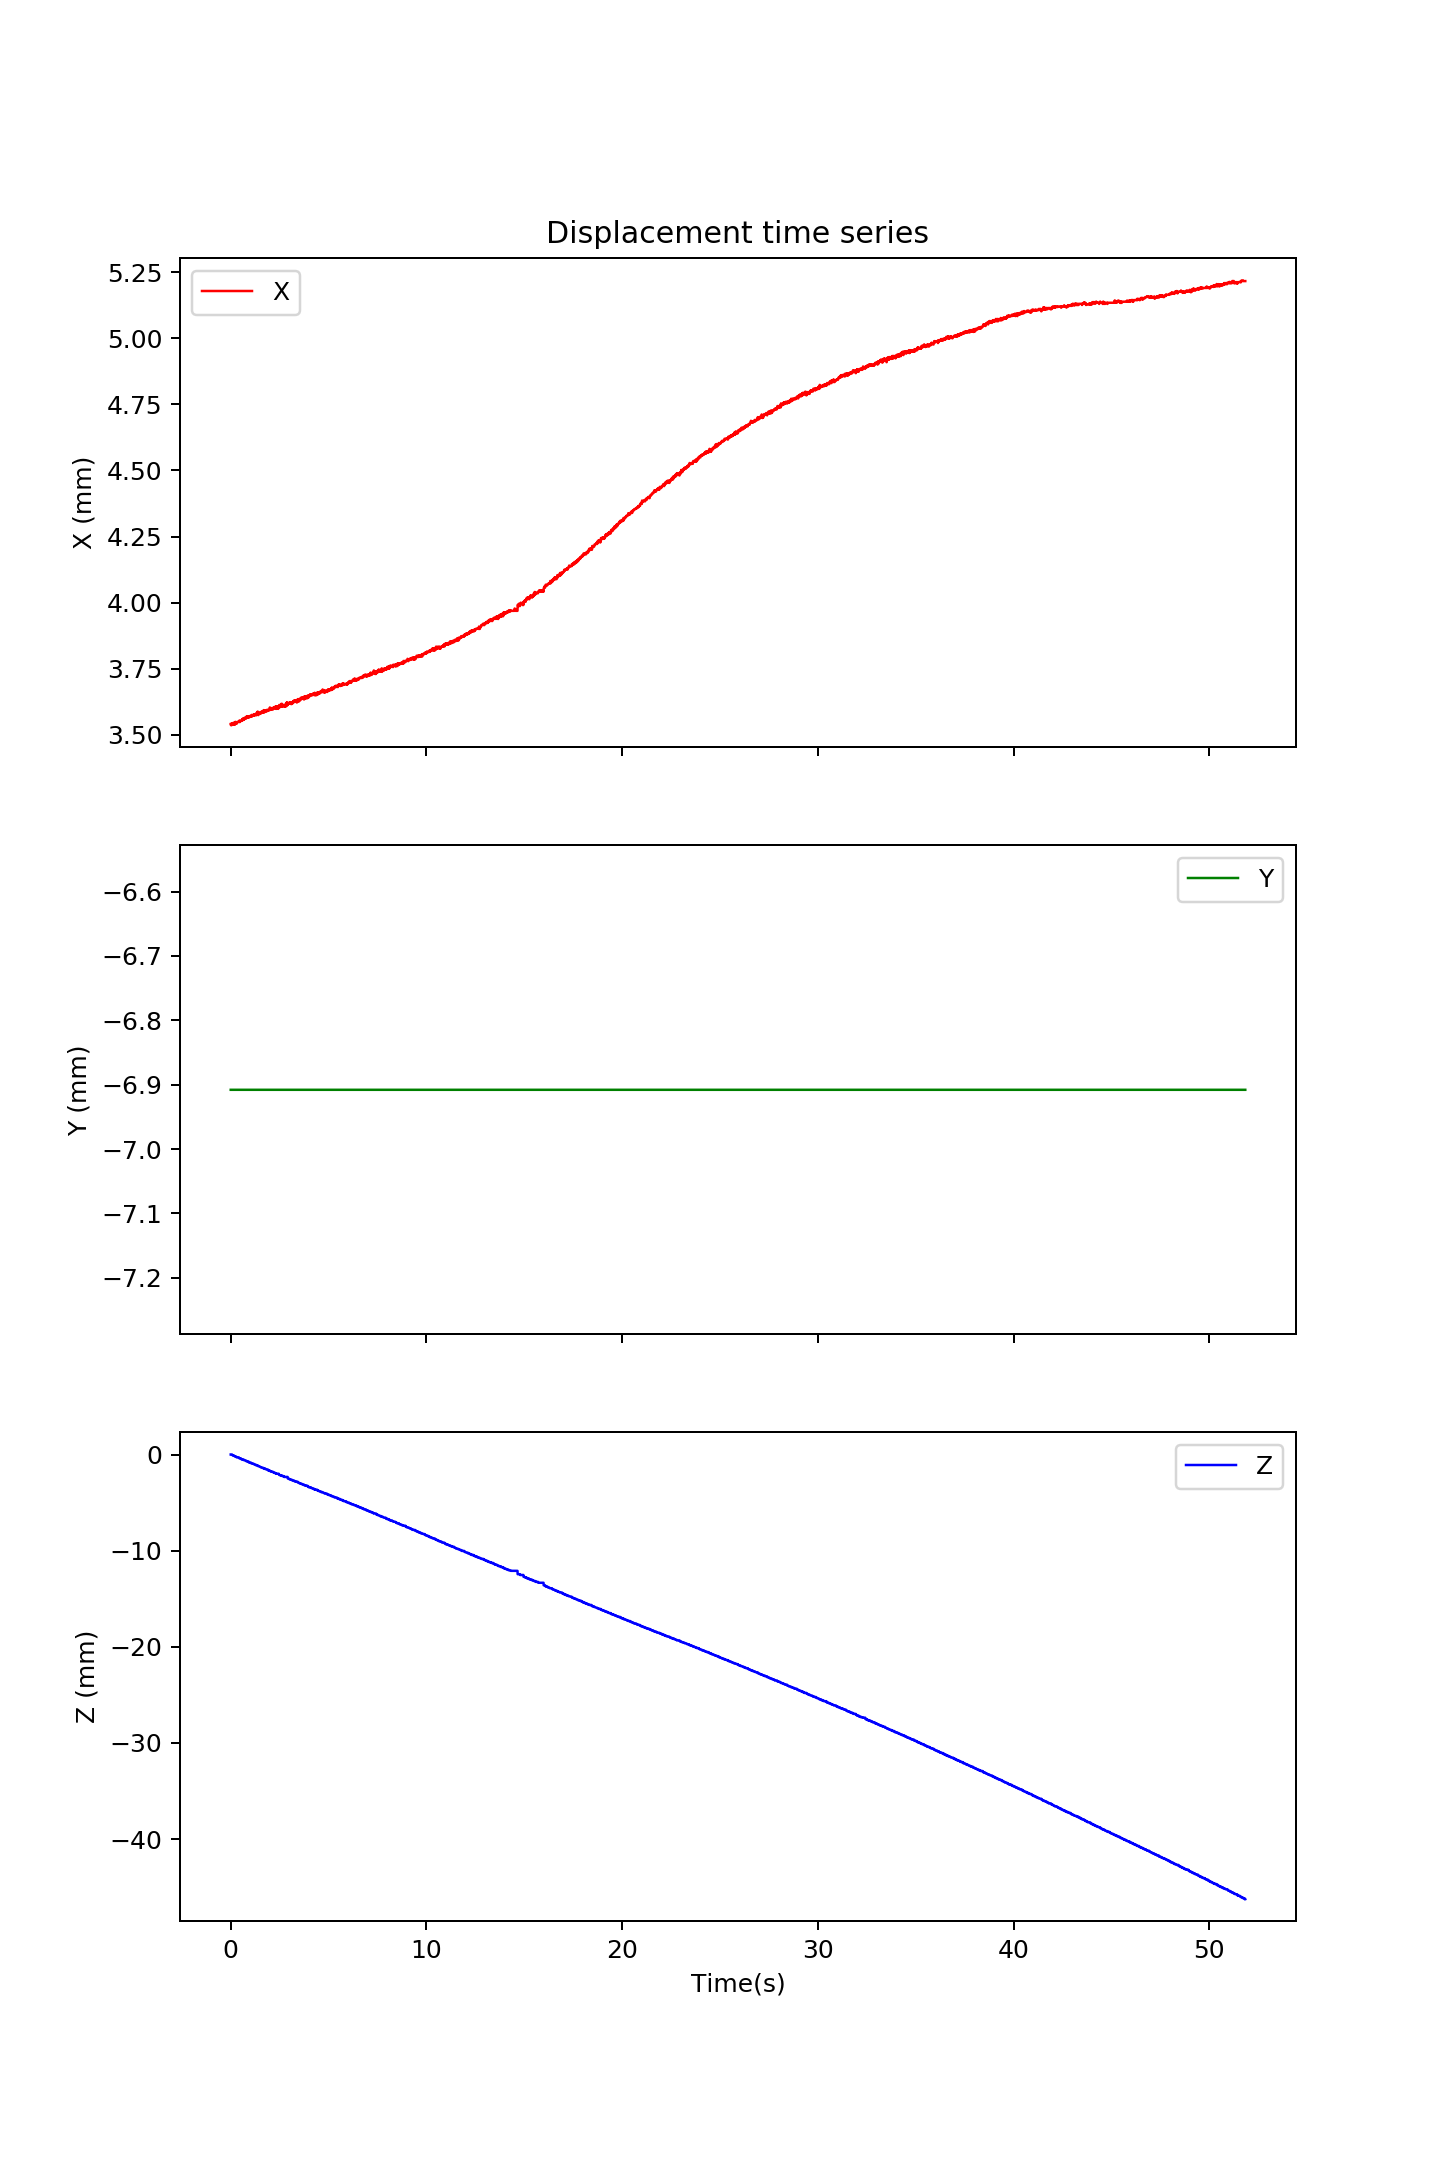

<IPython.core.display.Javascript object>


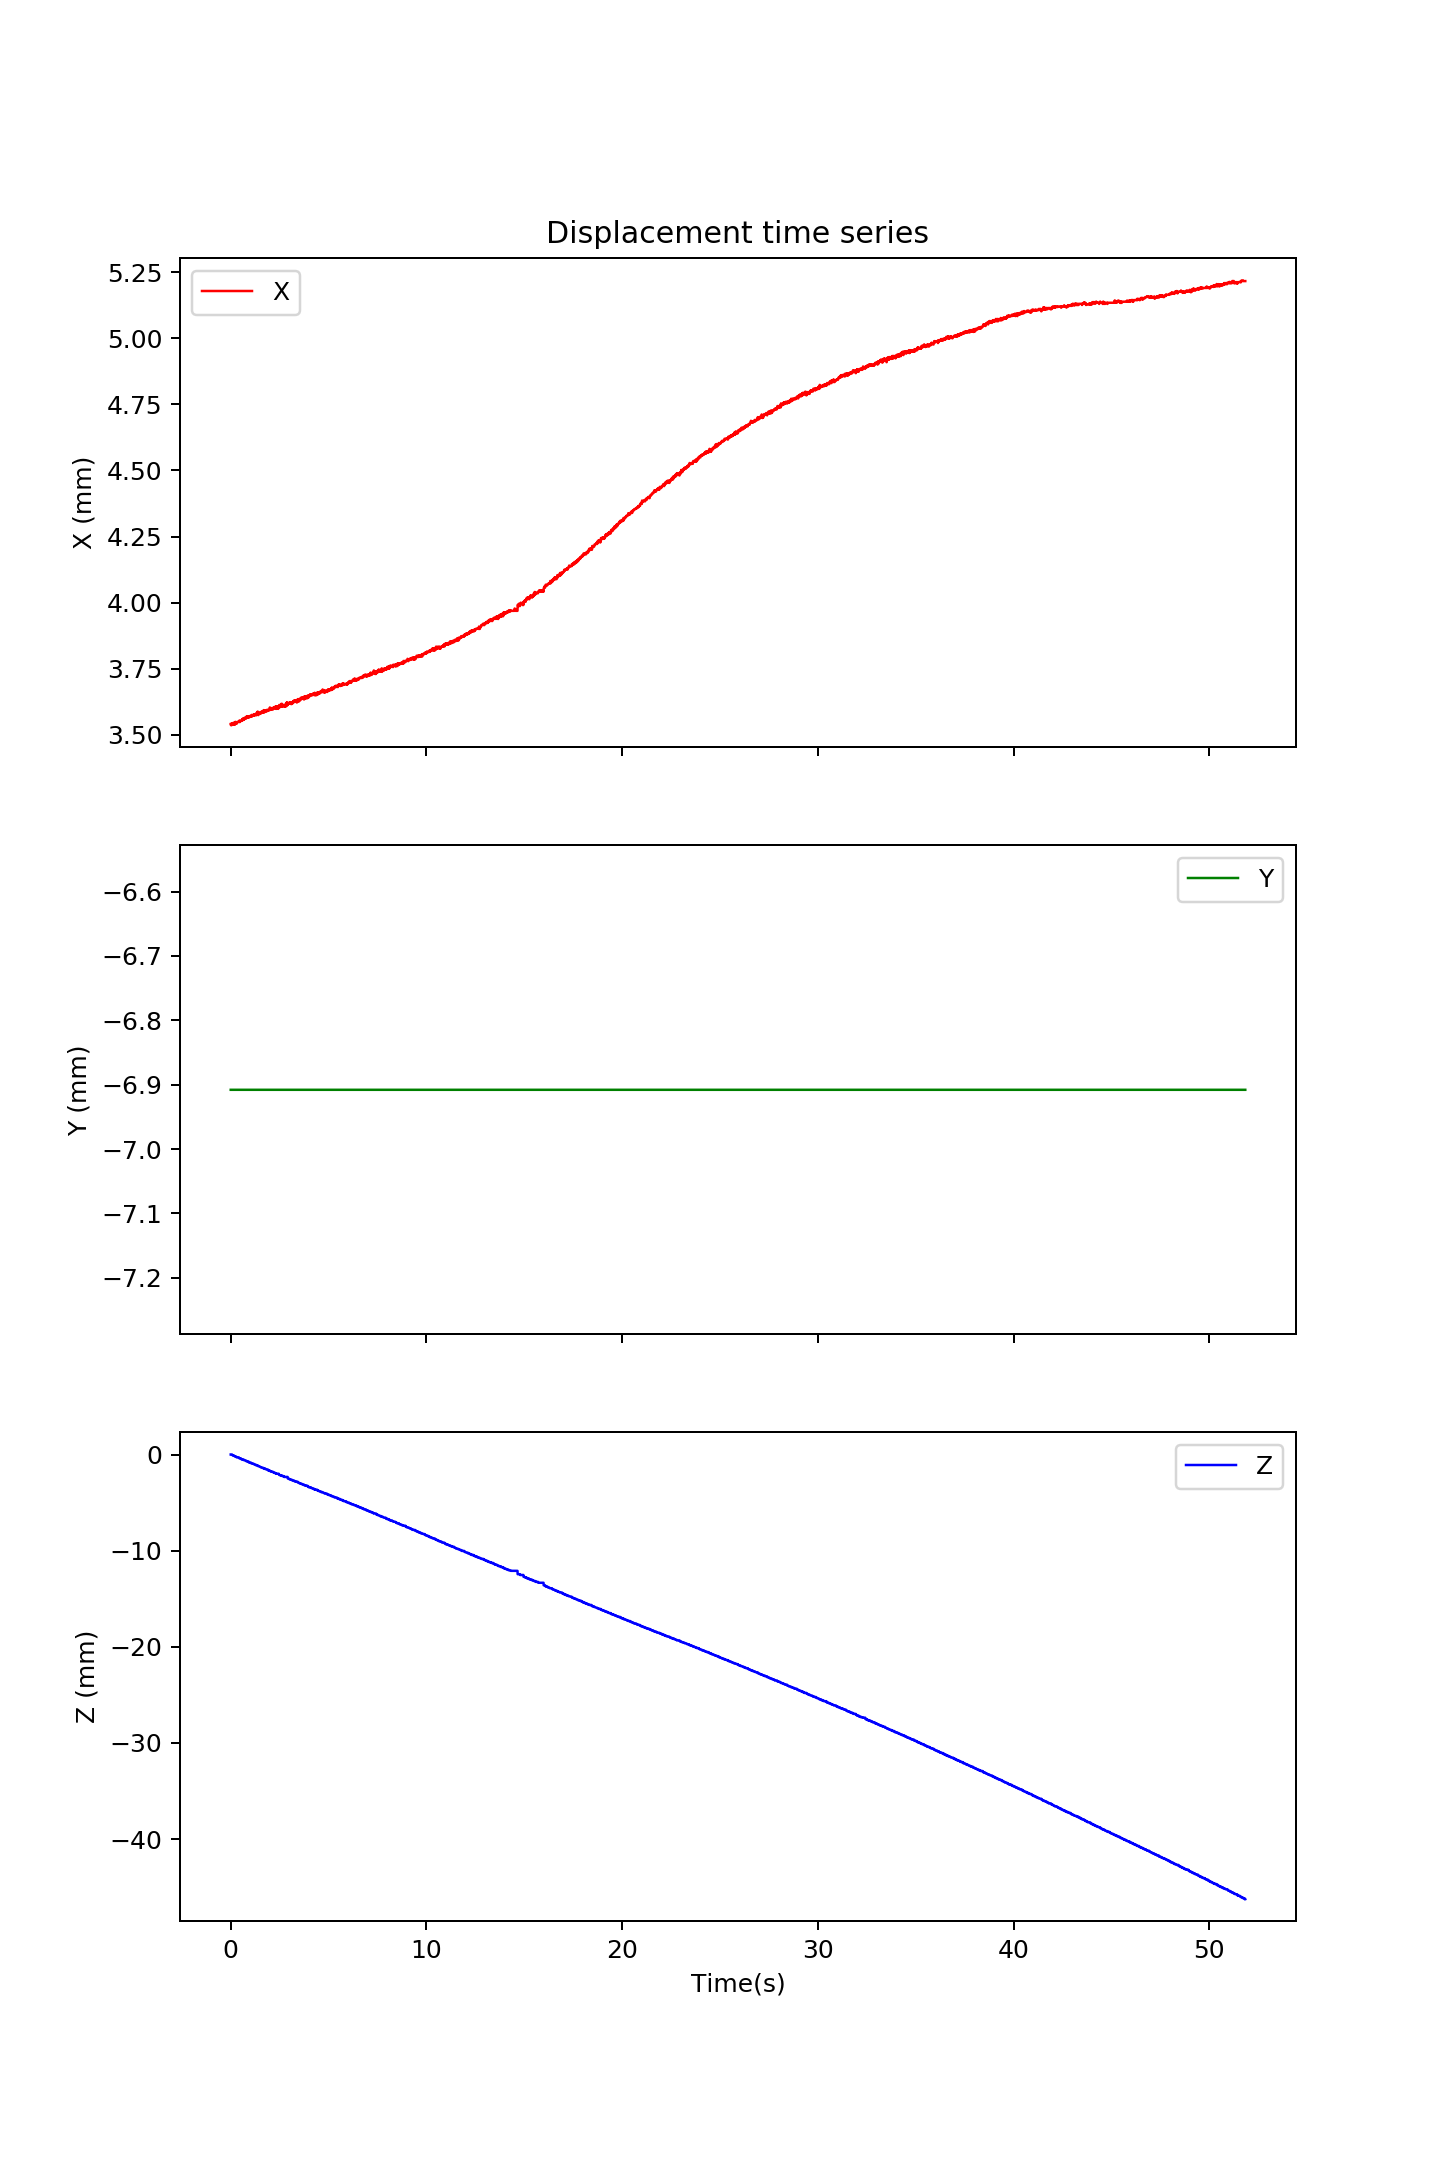

In [4]:
# The analysis API has a built-in function to generate X, Y, Z displacement plots
gm_analysis.plot_displacement_timeseries()
# To save the plots to file, do the following
gm_analysis.plot_displacement_timeseries(save = False)

## Compute the object's velocity

In [47]:
gm_analysis.compute_velocity()

## Apply a low-pass filter to the velocity data to filter out high-freq noise


In [48]:
window_size = 20
print('Window size: ',window_size)
gm_analysis.data['V_x'] = np.array(gm_analysis.data['V_x'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_y'] = np.array(gm_analysis.data['V_y'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_z'] = np.array(gm_analysis.data['V_z'].rolling(window = window_size, min_periods=1, center = True).mean())

print(gm_analysis.data['V_x'])

Window size:  20
0       0.000000e+00
1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
2414    1.665335e-17
2415    1.784287e-17
2416    1.921540e-17
2417    2.081668e-17
2418    2.270911e-17
Name: V_x, Length: 2419, dtype: float64


## Plot a time-series for the velocity

<IPython.core.display.Javascript object>


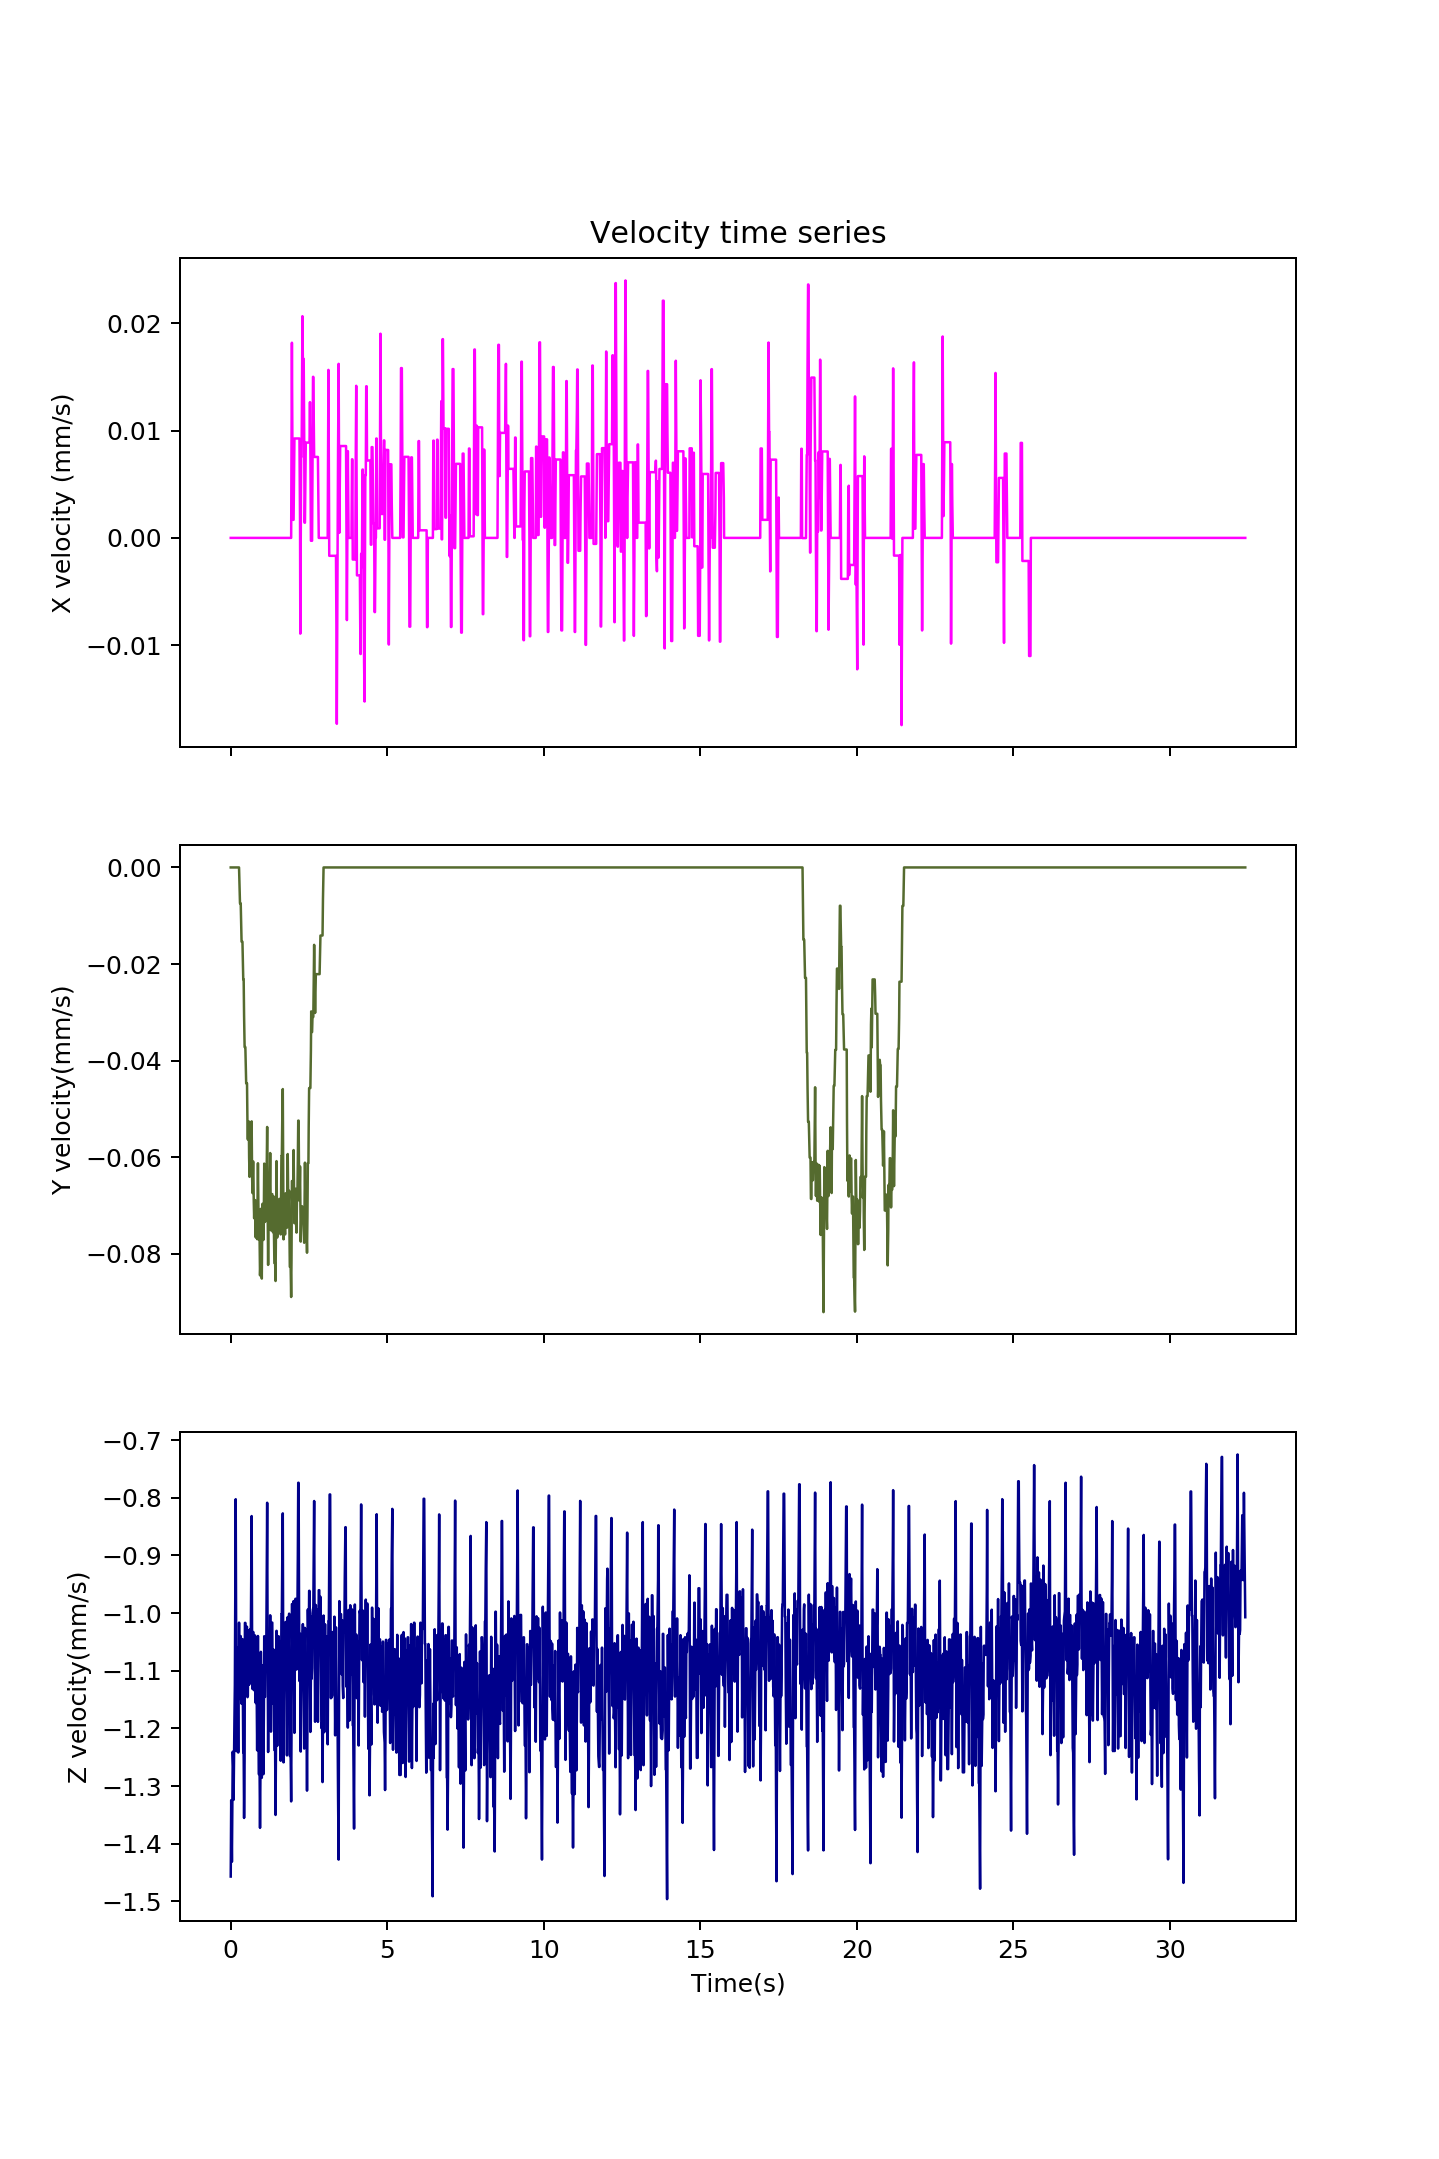

In [49]:
gm_analysis.plot_velocity_timeseries()

## Find the size of the object of interest

In [5]:
gm_analysis.set_color_thresholds()

[]
0000000.tif
Image properties found!
Image Width: 2000 px 
 Image Height: 1536 px
/Users/deepak/GravityMachine/aggregate_2021-06-07 18-39-50/DF1/00000/0000000.tif
Color thresholds for segmentation: 
 LOW: (0, 0, 145), HIGH : (255, 255, 255)


In [5]:
gm_analysis.find_object_size()

Color thresholds available! 
 Loading file /Users/deepak/GravityMachine/aggregate_2021-06-07 18-39-50/colorThresholds.pkl ...
Color thresholds for segmentation: 
 LOW: (0, 0, 145), HIGH : (255, 255, 255)
Loading organism size from memory ...
**************************************************
object diameter 0.6692074575241964 mm
object diameter max 0.638050103643138 mm
object diameter min 0.7003648114052549 mm
**************************************************


## Running PIV on a pair of frames

### PIV tests

--------------------------------------------------
Analyzing Frame pairs: Y4-S3_Camera000398.tif and Y4-S3_Camera000399.tif 

--------------------------------------------------
Max sig2noise: 6.1246943729594
Min sig2noise: 2.093752127973182
Mean sig2noise: 3.3882521953984353
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------


<IPython.core.display.Javascript object>


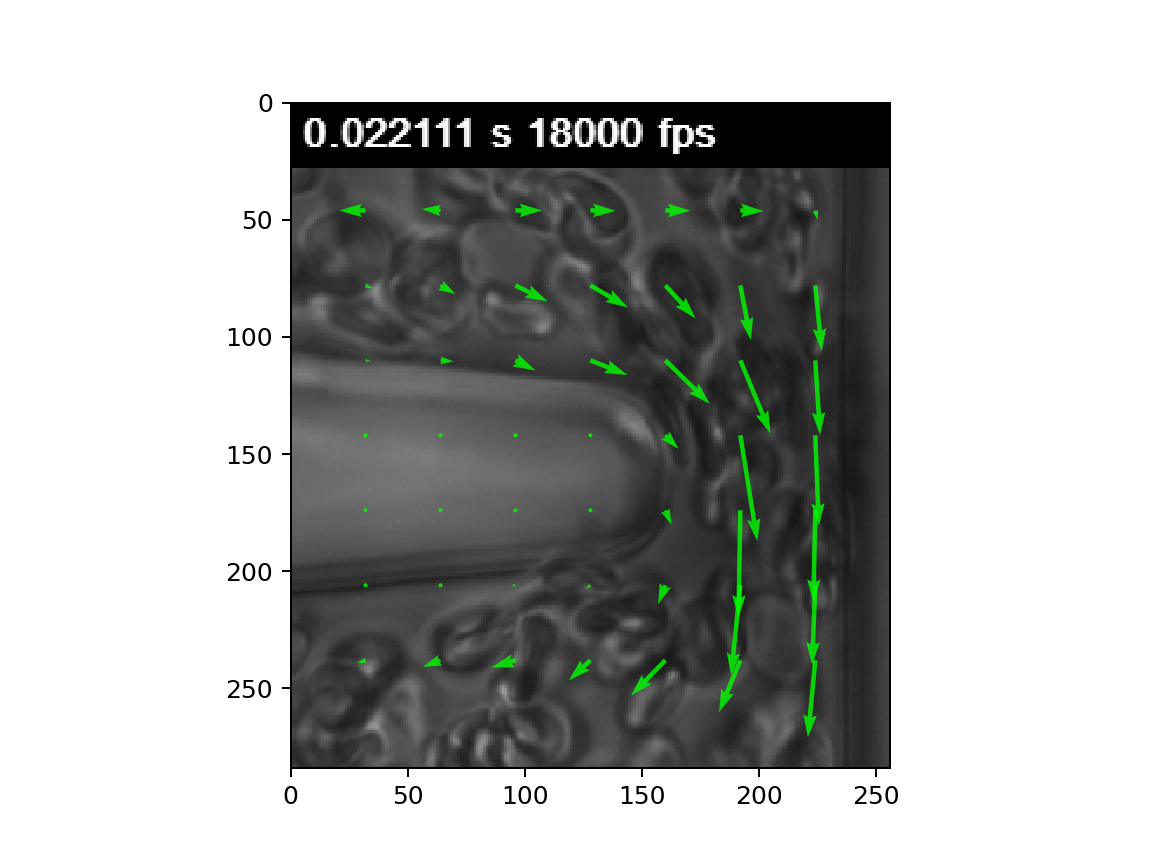

0.0005742780143940889
-0.003077917049373561


(0.0005742780143940889,
 -0.003077917049373561,
 0.002115694579711718,
 0.004070364145740387)

In [9]:
""" PIV testing using test images
# Run PIV on a pair of test images to see if it works correctly.
"""
# Test 1
image_a, image_b = 'Y4-S3_Camera000398.tif', 'Y4-S3_Camera000399.tif'
# Test 2
# image_a, image_b = '2image_00.tif', '2image_01.tif'
# Test 3
# image_a, image_b = 'exp1_001_a.bmp', 'exp1_001_b.bmp'

gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a = image_a, image_b = image_b, test = True)

--------------------------------------------------
Analyzing Frame pairs: 0000000.tif and 0000001.tif 

--------------------------------------------------
Max sig2noise: 40.19802460063967
Min sig2noise: 1.0867489688753307
Mean sig2noise: 8.464505508436677
--------------------------------------------------
Percentage of bad vectors: 0.38367631670735963 %
--------------------------------------------------
[  0   0 145]
[255 255 255]
No:of contours:3


<IPython.core.display.Javascript object>


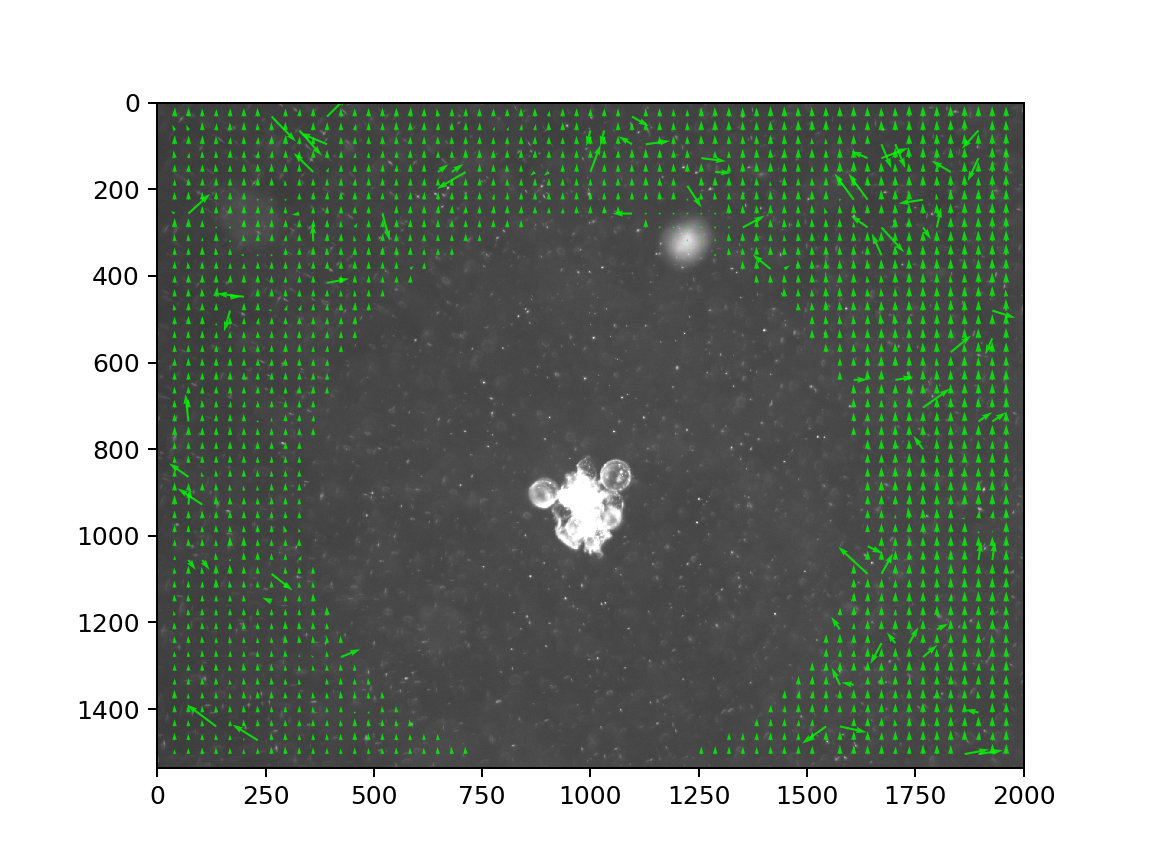

-8.414534443619238e-05
0.02709387991629127


(-8.414534443619238e-05,
 0.02709387991629127,
 0.013230730543203744,
 0.013758526575132324)

In [6]:
image_a = '0000000.tif'
image_b = '0000001.tif'
gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a, image_b, masking = False)

--------------------------------------------------
Analyzing Frame pairs: 0000000.tif and 0000001.tif 

--------------------------------------------------
Max sig2noise: 31.745019989761225
Min sig2noise: 1.6469882394687436
Mean sig2noise: 9.706539280195013
--------------------------------------------------
Percentage of bad vectors: 0.0 %
--------------------------------------------------
[  0   0 145]
[255 255 255]
No:of contours:3


<IPython.core.display.Javascript object>


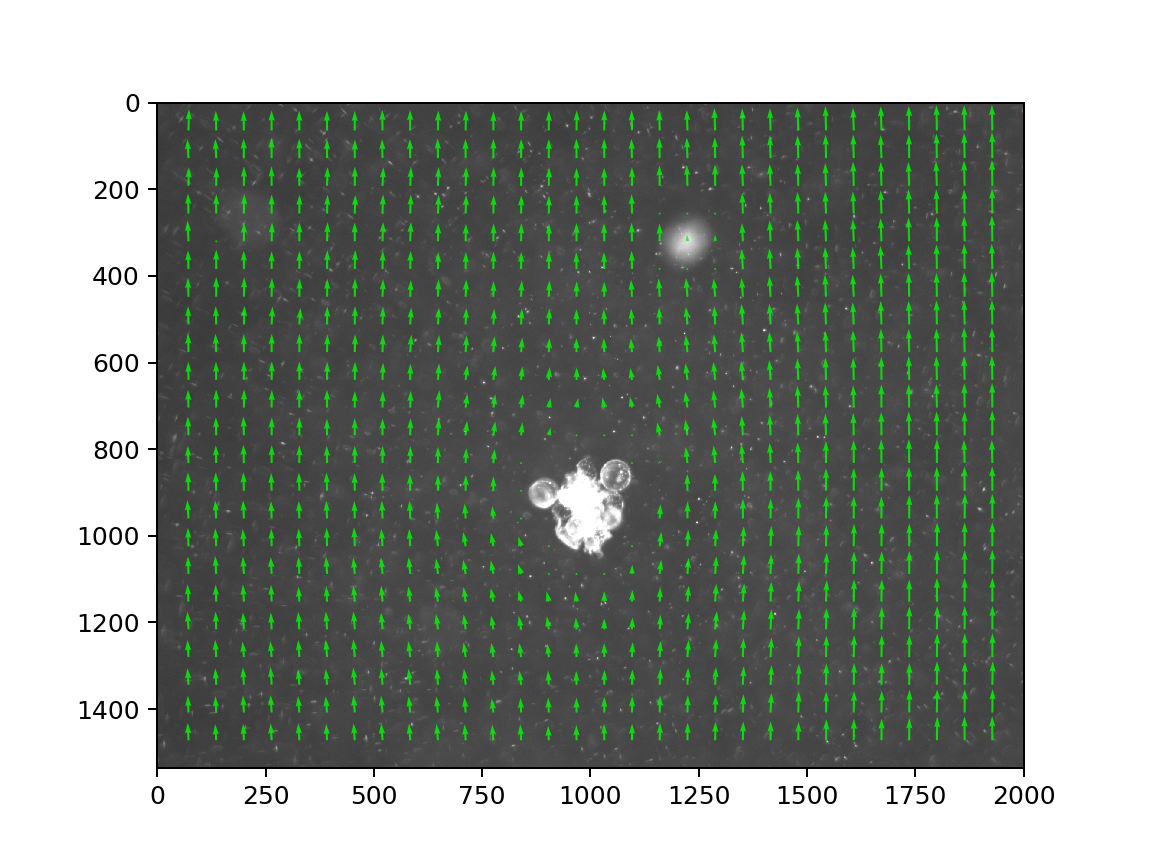

-0.00043469921518465035
0.026091304607098822


(-0.00043469921518465035,
 0.026091304607098822,
 0.0012125701930297157,
 0.006604941891204414)

In [8]:
gm_analysis.piv_settings['window size']= 128
gm_analysis.piv_settings['overlap']= 64
gm_analysis.piv_settings['search area']= 128
gm_analysis.piv_settings['scale-factor']= 1
gm_analysis.compute_background_fluid_velocity(image_a, image_b, masking = True)

In [93]:
gm_analysis.piv_settings

{'window size': 64, 'overlap': 32, 'search area': 64, 'scale-factor': 5}

## Running PIV analysis to compute the object's velocity and displacement relative to the fluid

In [11]:
gm_analysis.compute_fluid_velocity_timeseries()

Fluid time series found! Loading ...


## Compute the corrected displacement of the object relative to the fluid

In [12]:
gm_analysis.compute_fluid_relative_disp(overwrite_flag = False, save = True)

Fluid time series found! Loading ...


<IPython.core.display.Javascript object>


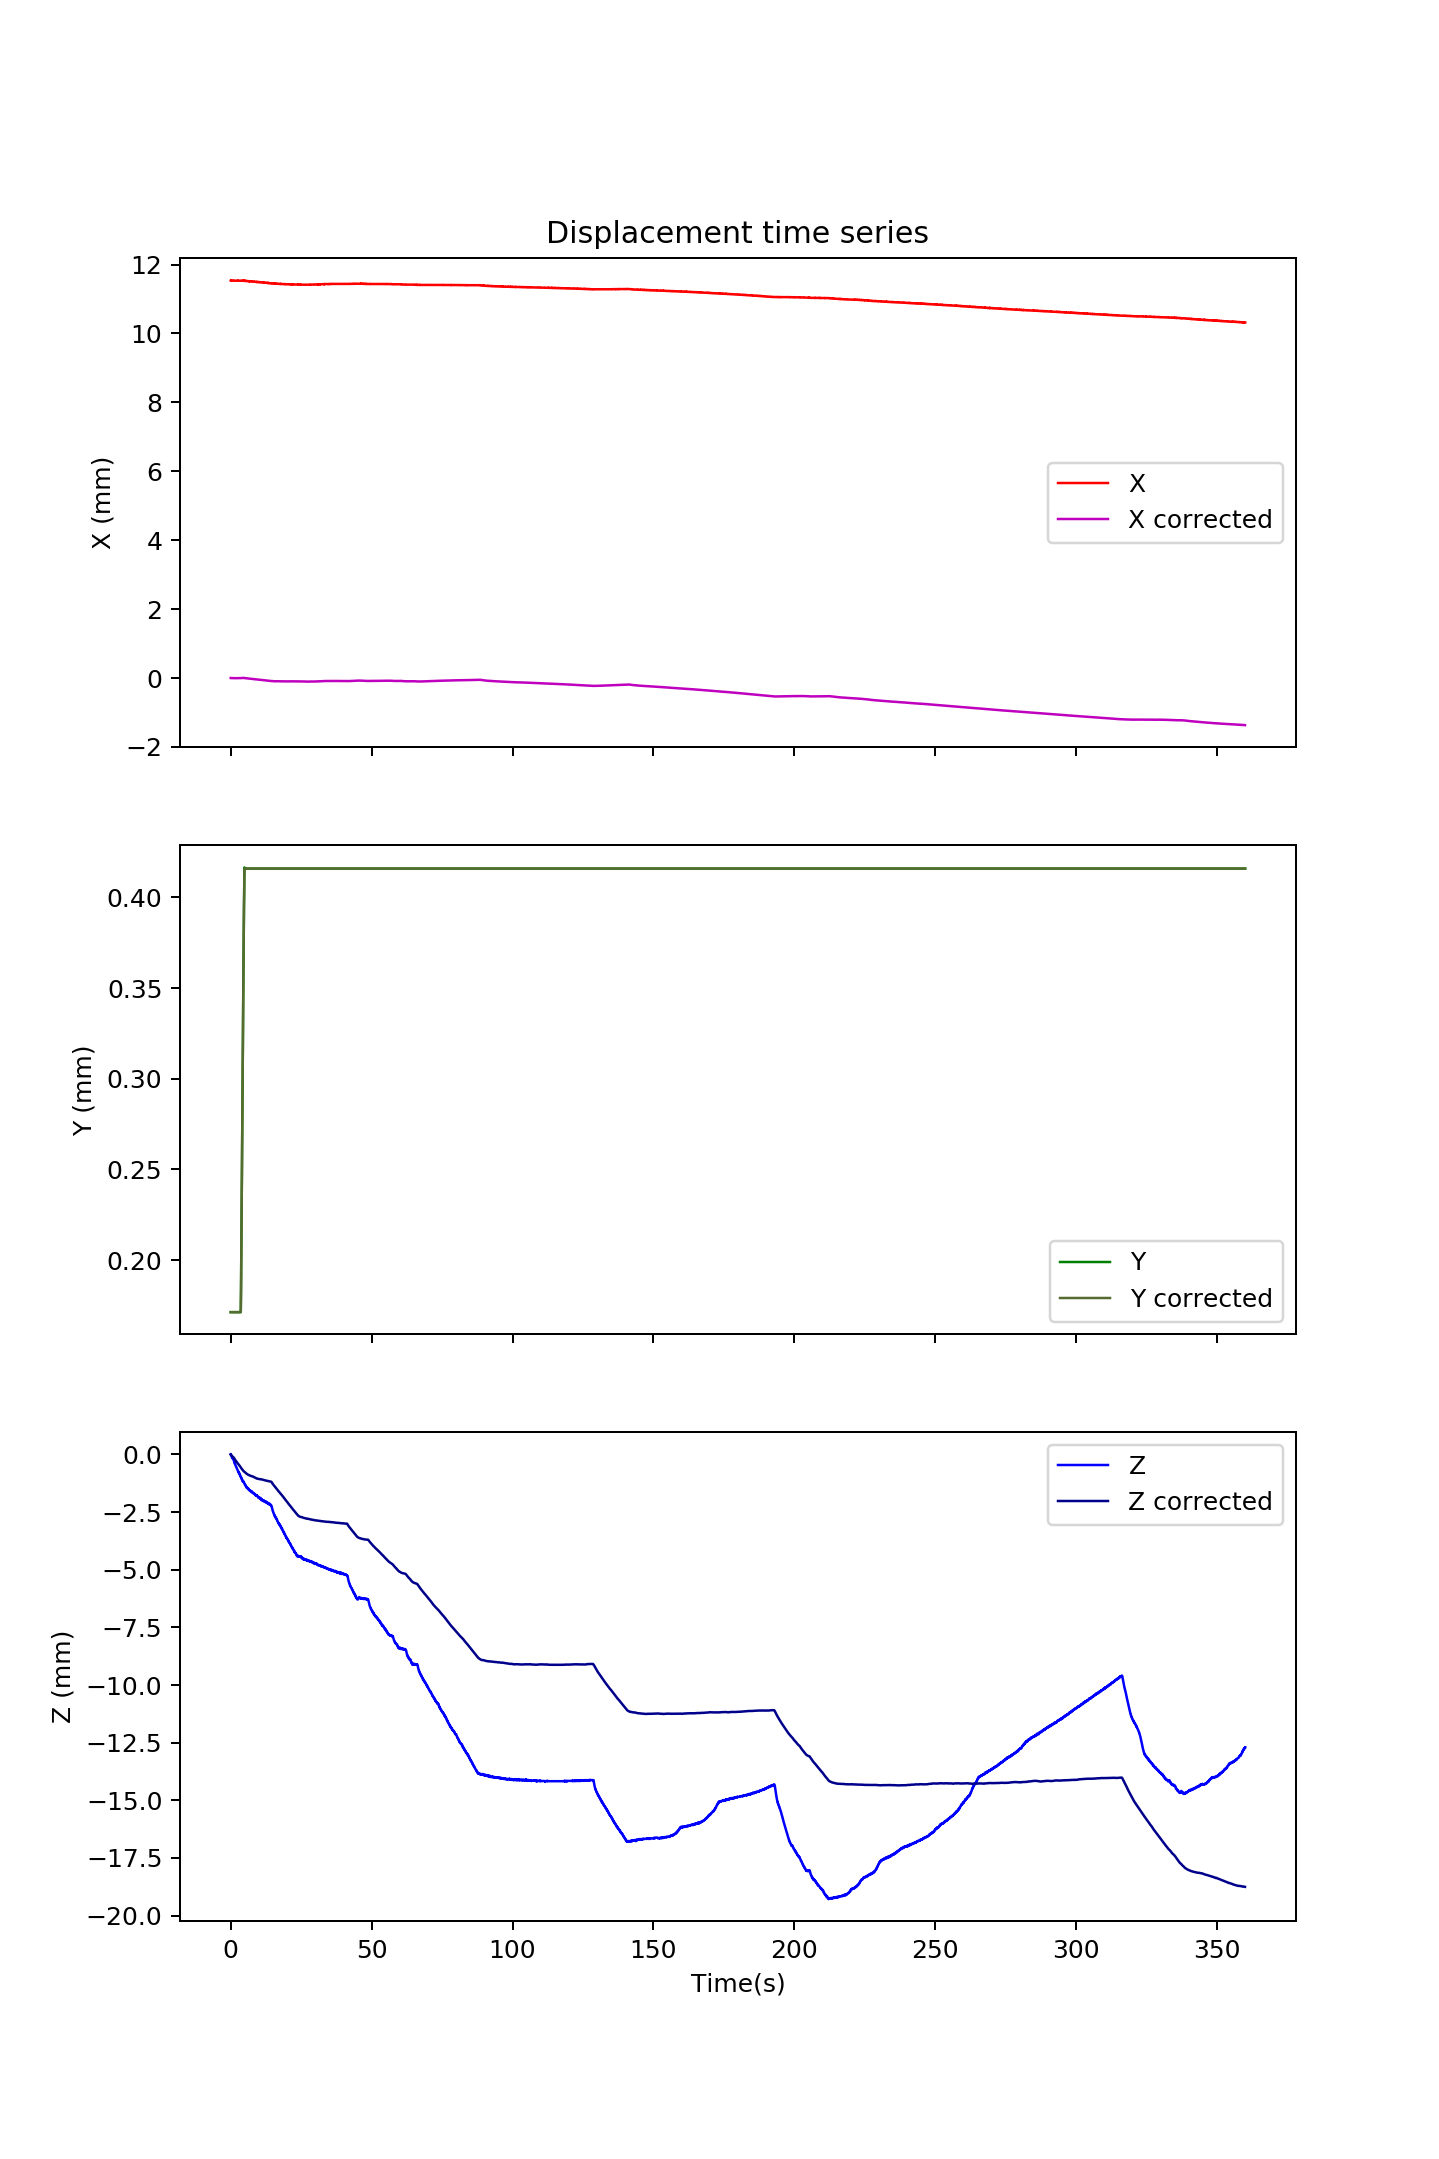

In [13]:
## Plot the raw and corrected displacements
units = {'Time':'(s)', 'X':'(mm)','Y':'(mm)','Z':'(mm)', 'V_x': '(mm/s)','V_y': '(mm/s)','V_z': '(mm/s)', 'Theta':'(rad)'}

import seaborn as sns

title = 'Displacement time series'
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (8,12))
ax1.set_title(title)
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['X'], color = 'r', linewidth = 1, label = 'X', ax = ax1, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['X'], color = 'm', linewidth = 1, label = 'X corrected', ax = ax1, ci = None)
ax1.set_ylabel('X '+units['X'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Y'], color = 'g', linewidth = 1, label = 'Y', ax = ax2, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Y'], color = 'darkolivegreen', linewidth = 1, label = 'Y corrected', ax = ax2, ci = None)
ax2.set_ylabel('Y '+units['Y'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Z'], color = 'b', linewidth = 1, label = 'Z', ax = ax3, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Z'], color = 'darkblue', linewidth = 1, label = 'Z corrected', ax = ax3, ci = None)

ax3.set_ylabel('Z '+units['Z'])
ax3.set_xlabel('Time' + units['Time'])
plt.show()

In [21]:
gm_analysis.data

,Time,X,Y,Z,Image name,X_image,Z_image,V_x,V_y,V_z,V_x_image,V_z_image
0,0.000000,11.536563,0.171250,0.000000,IMG_3878.tif,None,-0.108280,-0.003412,0.000000e+00,-0.266825,0.0,0.000000
1,0.025081,11.536563,0.171250,-0.010422,NaN,None,-0.108280,-0.003249,0.000000e+00,-0.261678,0.0,0.075113
2,0.042399,11.536563,0.171250,-0.007238,NaN,None,-0.105096,-0.003102,0.000000e+00,-0.260641,0.0,0.000000
3,0.066455,11.536563,0.171250,-0.020845,IMG_3879.tif,None,-0.108280,-0.002967,0.000000e+00,-0.256521,0.0,0.000000
4,0.086212,11.533378,0.171250,-0.017660,NaN,None,-0.105096,-0.002843,0.000000e+00,-0.252639,0.0,0.069476
...,...,...,...,...,...,...,...,...,...,...,...,...
16007,359.887024,10.319375,0.415938,-12.726232,IMG_8002.tif,None,0.035032,-0.006276,3.691492e-17,0.150749,0.0,0.000000
16008,359.912891,10.319375,0.415938,-12.715937,NaN,None,0.035032,-0.006537,3.845304e-17,0.157030,0.0,0.071786
16009,359.931388,10.316190,0.415938,-12.712753,NaN,None,0.038217,-0.006821,4.012491e-17,0.151105,0.0,0.000000
16010,359.963501,10.319062,0.415938,-12.715937,IMG_8003.tif,None,0.035032,-0.007132,4.194877e-17,0.147845,0.0,-0.059052


0        0.171250
1        0.171250
2        0.171250
3        0.171250
4        0.171250
           ...   
16007    0.415938
16008    0.415938
16009    0.415938
16010    0.415938
16011    0.415938
Name: Y, Length: 16012, dtype: float64

10
9
8
7
6
5
4
3
2
1
